In [7]:
import numpy as np
from scipy.io import loadmat
import os
import pandas as pd
import time
import random
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from math import floor

download_data_readpath = 'E:/Dataset/wind_shear/Data_Download'
exception_data_readpath = '../Dataset/Exception_Data'
result_savepath = '../result'
all_var_correlation_savepath = 'E:/Dataset/wind_shear/variable correlation'

# 读取download_path目录下的所有文件夹
download_folder_names = [item for item in os.listdir(download_data_readpath) if os.path.isdir(os.path.join(download_data_readpath,item))]

# 读取exception_data_path目录下的所有文件夹
exception_folder_names = [item for item in os.listdir(exception_data_readpath) if os.path.isdir(os.path.join(exception_data_readpath, item))]

correlation_savepath = os.path.join(result_savepath, "variable_correlation")
if not os.path.exists(correlation_savepath):
    os.mkdir(correlation_savepath)

# 读取数据子集字典
random_mat_dict = np.load(os.path.join(result_savepath, 'random_mat_dict.npy'), allow_pickle=True).item()

In [1]:
# give the preset classification of variables
group_names_list = ["mechanism", "power", "control", "external", "recorder", "unclassified"]
group_lens_dict = {}

var_group_mechanism = ["AIL_1", "AIL_2", "FLAP", "ELEV_1", "ELEV_2", "RUDD", "SPL_1", "SPL_2", "SPLG", "SPLY", "ABRK", "BPGR_1", "BPGR_2", "BPYR_1", "BPYR_2", "MSQT_1", "MSQT_2", "NSQT", "BLV", "CALT", "PACK", "WOW", 
                       "AOA1", "AOA2", "GLS", "PTCH", "ROLL", 
                       "TH", "MH", "TAS", "CASM", "GS", "IVV",
                       "VRTG", "LATG", "LONG", "FPAC", "CTAC"]
var_group_power = ["N2_1", "N2_2", "N2_3", "N2_4",
                   "ECYC_1", "ECYC_2", "ECYC_3", "ECYC_4", "EHRS_1", "EHRS_2", "EHRS_3", "EHRS_4", "VIB_1", "VIB_2", "VIB_3", "VIB_4", "FADS", "HYDG", "HYDY",
                   "N1_1", "N1_2", "N1_3", "N1_4", "N1T", "FF_1", "FF_2", "FF_3", "FF_4", "FQTY_1", "FQTY_2", "FQTY_3", "FQTY_4", "OIP_1", "OIP_2", "OIP_3", "OIP_4", "OIT_1", "OIT_2", "OIT_3", "OIT_4", "OIPL", "EGT_1", "EGT_2", "EGT_3", "EGT_4",
                   "LGDN", "LGUP"]
var_group_control = ["CRSS", "HDGS", "A_T", "APFD", "DFGS", "FGC3", "PUSH", "PTRM", "TCAS",
                     "ILSF", "RUDP", "CCPC", "CCPF", "CWPC", "CWPF", "PLA_1", "PLA_2", "PLA_3", "PLA_4",
                     "SNAP", "TMODE", "EAI", "TAI", "WAI_1", "WAI_2", 
                     "APUF", "FADF", "FIRE_1", "FIRE_2", "FIRE_3", "FIRE_4", "GPWS", "MW", "POVT", "SHKR", "SMOK", "TOCW"]
var_group_external = ["ALT", "ALTR", "WS", "WD", "PI", "PS", "PT", "SAT", "TAT",
                      "DA", "TRK", "TRKM", "LOC", "LATP", "LONP"]
var_group_recorder = ["DWPT", "PH", 
                     "ACMT", "FRMC", "GMT_HOUR", "GMT_MINUTE", "GMT_SEC"]
var_group_unclassified = ["ATEN", "EVNT", "HF1", "HF2", "VHF1", "VHF2", "VHF3", "LMOD", "VMODE", "MACH", "MNS", "MRK", "N1C", "N1CO", "SMKB", "VAR_1107", "VAR_2670", "VAR_5107", "VAR_6670"]

var_groups_dict = {"mechanism": var_group_mechanism, "power": var_group_power, "control": var_group_control, "external": var_group_external, "recorder": var_group_recorder, "unclassified": var_group_unclassified}
for group_name, var_group in var_groups_dict.items():
    group_lens_dict[group_name] = len(var_group)
    print(f"{group_name}: {len(var_group)}")
print(f"\n{sum(group_lens_dict.values())} variables in total")

mechanism: 38
power: 47
control: 37
external: 15
recorder: 7
unclassified: 19

163 variables in total


In [6]:
# give the preset classification of selected variables
group_names_list = ["mechanism", "power", "control", "external", "recorder", "unclassified"]
group_lens_dict = {}

var_group_mechanism = ["AIL_1", "AIL_2", "FLAP", "ELEV_1", "ELEV_2", "RUDD", "SPL_1", "SPL_2", "SPLG", "ABRK", "BPGR_2", "BPYR_1", "WOW",
                       "AOA1", "AOA2", "GLS", "PTCH", "ROLL", "TH", 
                       "TAS", "CASM", "GS", "IVV",
                       "VRTG", "LATG", "LONG", "FPAC", "CTAC"]
var_group_power = [
                   "ECYC_1", "ECYC_2", "ECYC_3", "ECYC_4", "EHRS_1", "EHRS_2", "EHRS_3", "EHRS_4", "FADS", "HYDY",
                   "N1_1", "N1_2", "N1_3", "N1_4", "N1T", 
                   "FQTY_1", "FQTY_2", "FQTY_3", "FQTY_4", "OIT_1", "OIT_2", "OIT_3", "OIT_4", 
                   "LGUP", "LGDN"]
var_group_control = ["HDGS", "CRSS", "FGC3", "PUSH", "PTRM", "A_T", "DFGS", 
                     "ILSF", "RUDP", "CCPC", "CCPF", "CWPC", "CWPF",
                     "SNAP", "TMODE",
                     "GPWS", "SHKR", "FADF"]
var_group_external = ["ALT", "ALTR", "WS", "WD", "PI", "PT", "TAT",
                      "DA", "TRK", "LOC", "LATP", "LONP"]
var_group_recorder = ["PH", 
                     "ACMT", "FRMC"]
var_group_unclassified = ["EVNT", "HF1", "HF2", "VHF1", "VHF2", "VHF3", "LMOD", "VMODE", "MACH", "MRK", "SMKB", "VAR_1107"]

var_groups_dict = {"mechanism": var_group_mechanism, "power": var_group_power, "control": var_group_control, "external": var_group_external, "recorder": var_group_recorder, "unclassified": var_group_unclassified}
for group_name, var_group in var_groups_dict.items():
    group_lens_dict[group_name] = len(var_group)
    print(f"{group_name}: {len(var_group)}")
print(f"\n{sum(group_lens_dict.values())} variables in total")

mechanism: 28
power: 25
control: 18
external: 12
recorder: 3
unclassified: 12

98 variables in total


In [5]:
# give the preset classification of determined variables
group_names_list = ["mechanism", "power", "control", "external", "recorder", "unclassified"]
group_lens_dict = {}

var_group_mechanism = ["AIL_1", "AIL_2", "FLAP", "ELEV_1", "ELEV_2", "RUDD", "SPL_1", "SPL_2", "SPLG", "ABRK", "NSQT",
                       "AOA1", "AOA2", "GLS", "PTCH", "ROLL", "TH", 
                       "TAS", "CASM", "GS",
                       "VRTG", "LATG", "LONG", "FPAC", "CTAC"]
var_group_power = [
                   "FADS", 
                   
                   "FQTY_1", "FQTY_2", "FQTY_3", "FQTY_4", "OIT_1", "OIT_2", "OIT_3", "OIT_4", "OIPL",
                   "LGDN"]
var_group_control = ["HDGS", "PTRM", 
                     "RUDP", "CCPC", "CCPF", "CWPC", "CWPF",
                     "SNAP", 
                     "GPWS", "SHKR", "FADF"]
var_group_external = ["ALT", "WS", "WD", "PT", "TAT",
                      "LOC"]
var_group_recorder = ["PH"
                     ]
var_group_unclassified = ["EVNT", "HF1", "HF2", "VHF1", "VHF2", "VHF3", "SMKB"]

var_groups_dict = {"mechanism": var_group_mechanism, "power": var_group_power, "control": var_group_control, "external": var_group_external, "recorder": var_group_recorder, "unclassified": var_group_unclassified}
for group_name, var_group in var_groups_dict.items():
    group_lens_dict[group_name] = len(var_group)
    print(f"{group_name}: {len(var_group)}")
print(f"\n{sum(group_lens_dict.values())} variables in total")

mechanism: 25
power: 11
control: 11
external: 6
recorder: 1
unclassified: 7

61 variables in total


In [7]:
# generate the random selected dataset

# 初始化数据子集字典{folder: mat}
random_mat_dict = {}
for folder in download_folder_names:
    mat_names = os.listdir(os.path.join(download_data_readpath, folder))
    random_mat_dict[folder] = np.random.choice(mat_names, 1)[0]

# 存储数据子集字典
np.save(os.path.join(result_savepath, 'random_mat_dict.npy'), random_mat_dict)

In [14]:
# count the percentage of exception mats in the random selected dataset
exception_ratio = 0
for exception_folder in exception_folder_names:
    if random_mat_dict[exception_folder] in os.listdir(os.path.join(exception_data_readpath, exception_folder)):
        exception_ratio += 1
print('The exception ratio of the random selected dataset is:', exception_ratio / len(download_folder_names))

The exception ratio of the random selected dataset is: 0.03870967741935484


In [ ]:
# read variables in different groups

# 读取数据子集中WSHR的数据
WSHR_data_list = []
for folder in download_folder_names:
    mat_name = random_mat_dict[folder]
    mat_path = os.path.join(download_data_readpath, folder, mat_name)
    mat = loadmat(mat_path)
    WSHR_data = mat["WSHR"][0][0][0]
    WSHR_data_list.append(WSHR_data)
# np.save(os.path.join(correlation_savepath, "WSHR_data_list.npy"), WSHR_data_list)
np.save(os.path.join(all_var_correlation_savepath, "WSHR_data_list.npy"), WSHR_data_list)

# 读取数据子集中各变量组的数据
variables_data_lists_dict = {}
for group_name in group_names_list:
    variables_data_lists_dict[group_name] = []
    for folder in download_folder_names:
        variables_data_dict = {var: loadmat(os.path.join(download_data_readpath, folder, random_mat_dict[folder]))[var][0][0][0] for var in var_groups_dict[group_name]}
        variables_data_lists_dict[group_name].append(variables_data_dict)
    # np.save(os.path.join(correlation_savepath, group_name+"_variables_data_lists.npy"), variables_data_lists_dict[group_name])
    np.save(os.path.join(all_var_correlation_savepath, group_name+"_variables_data_lists.npy"), variables_data_lists_dict[group_name])


C:\Users\86108\AppData\Local\Temp\ipykernel_43940\1574229304.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("YlGnBu")


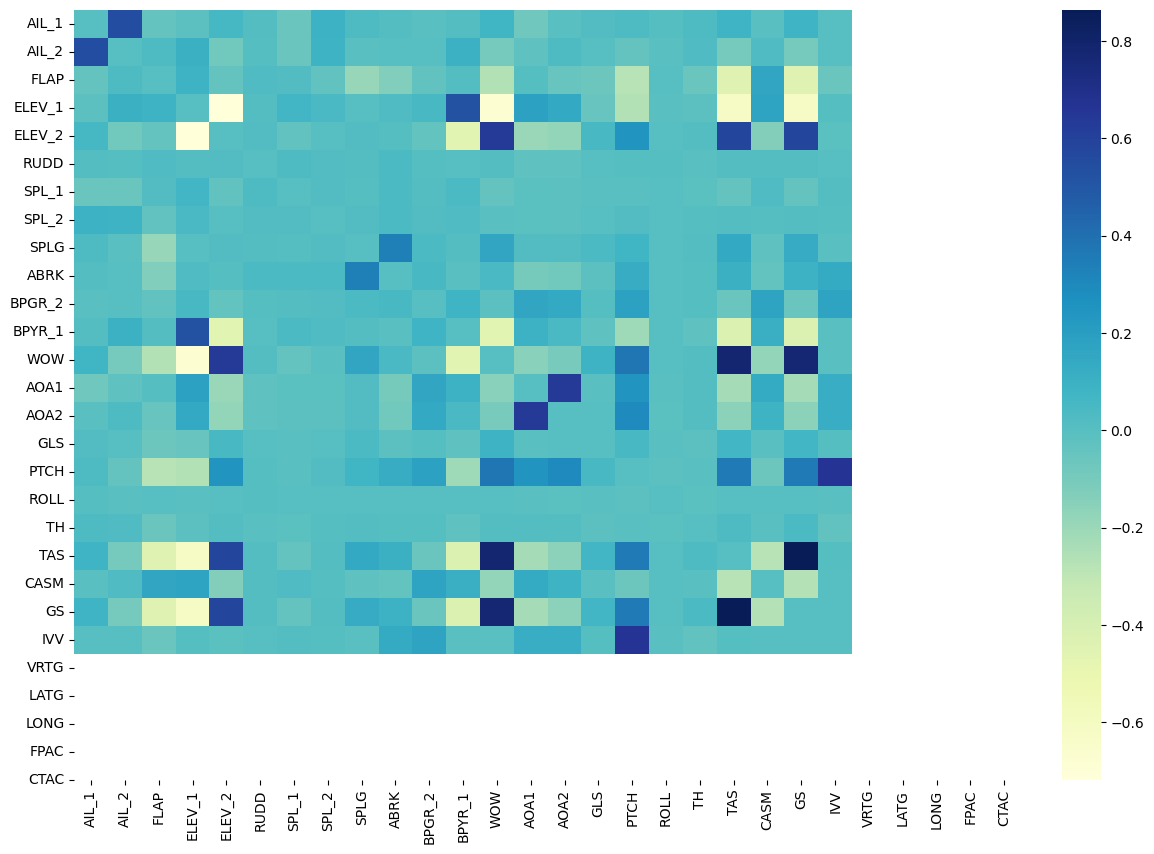

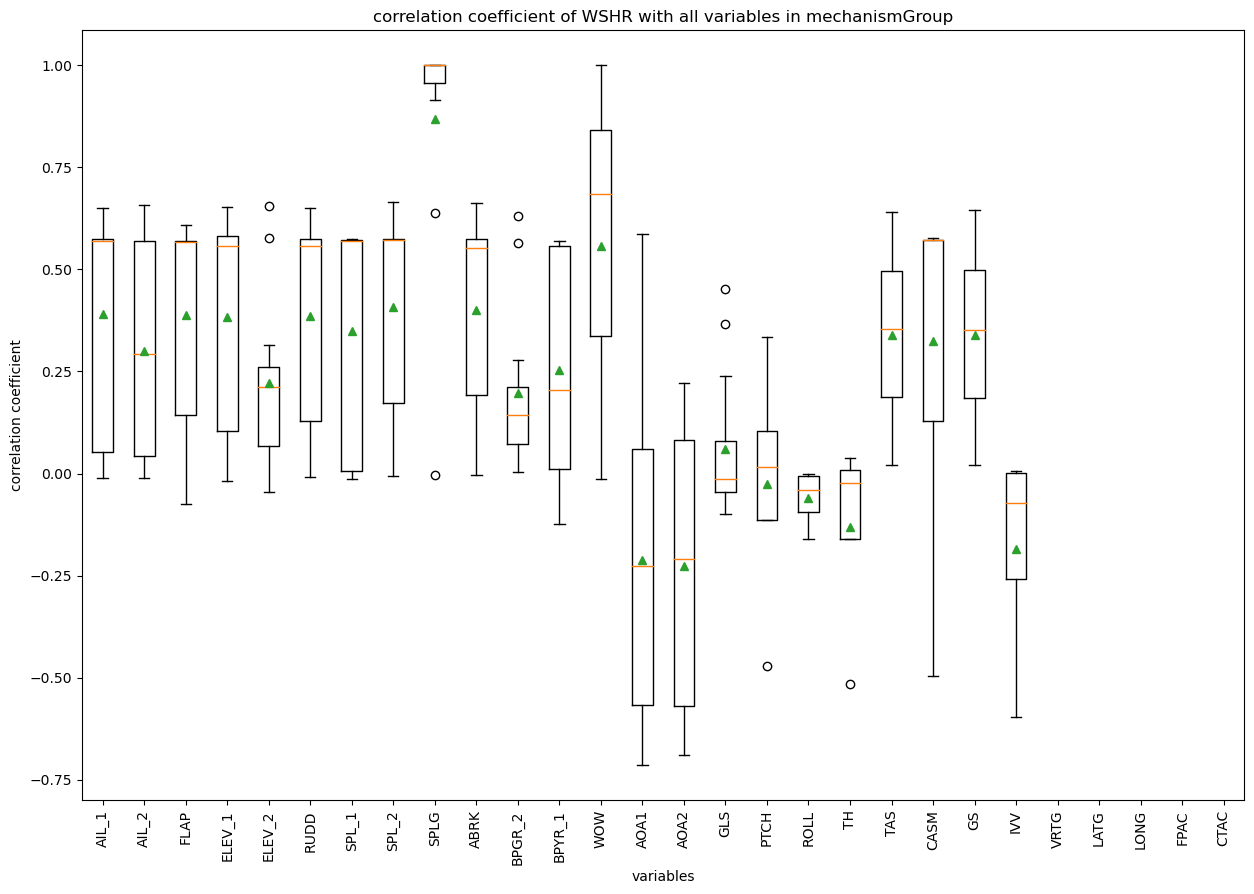

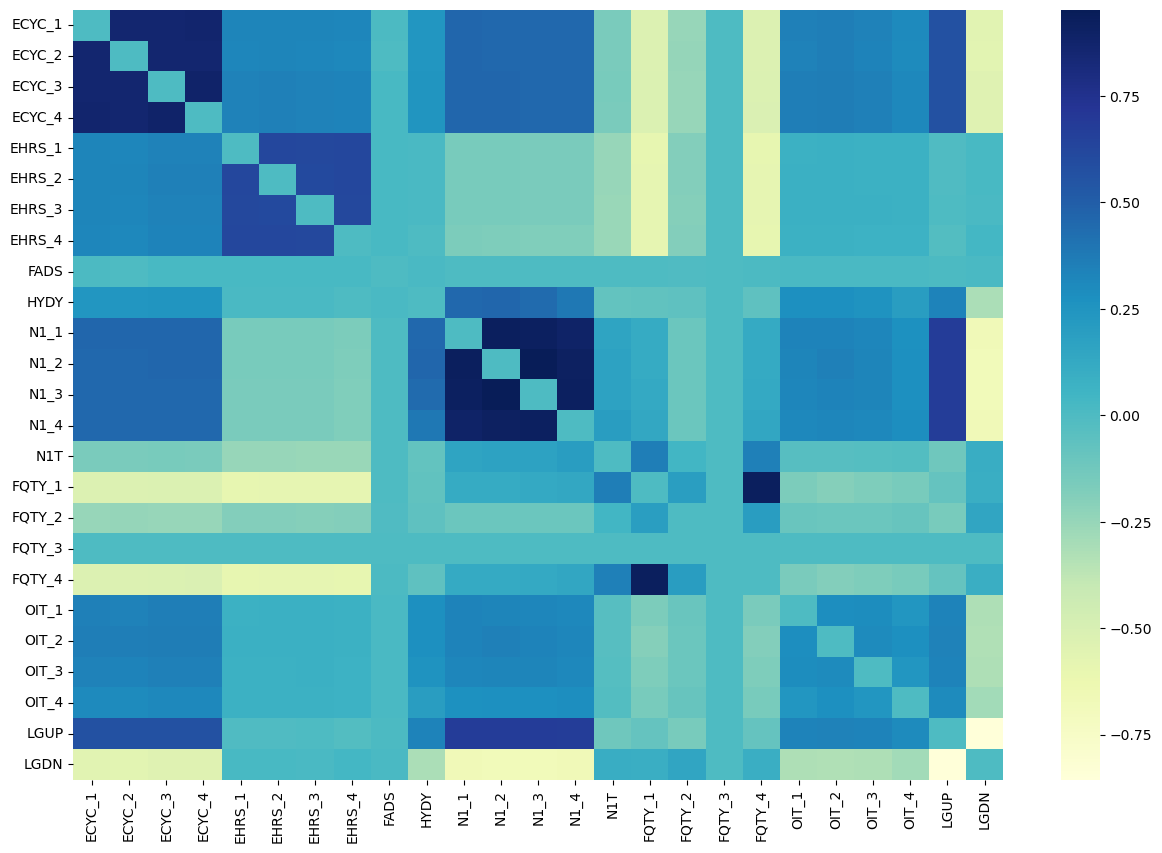

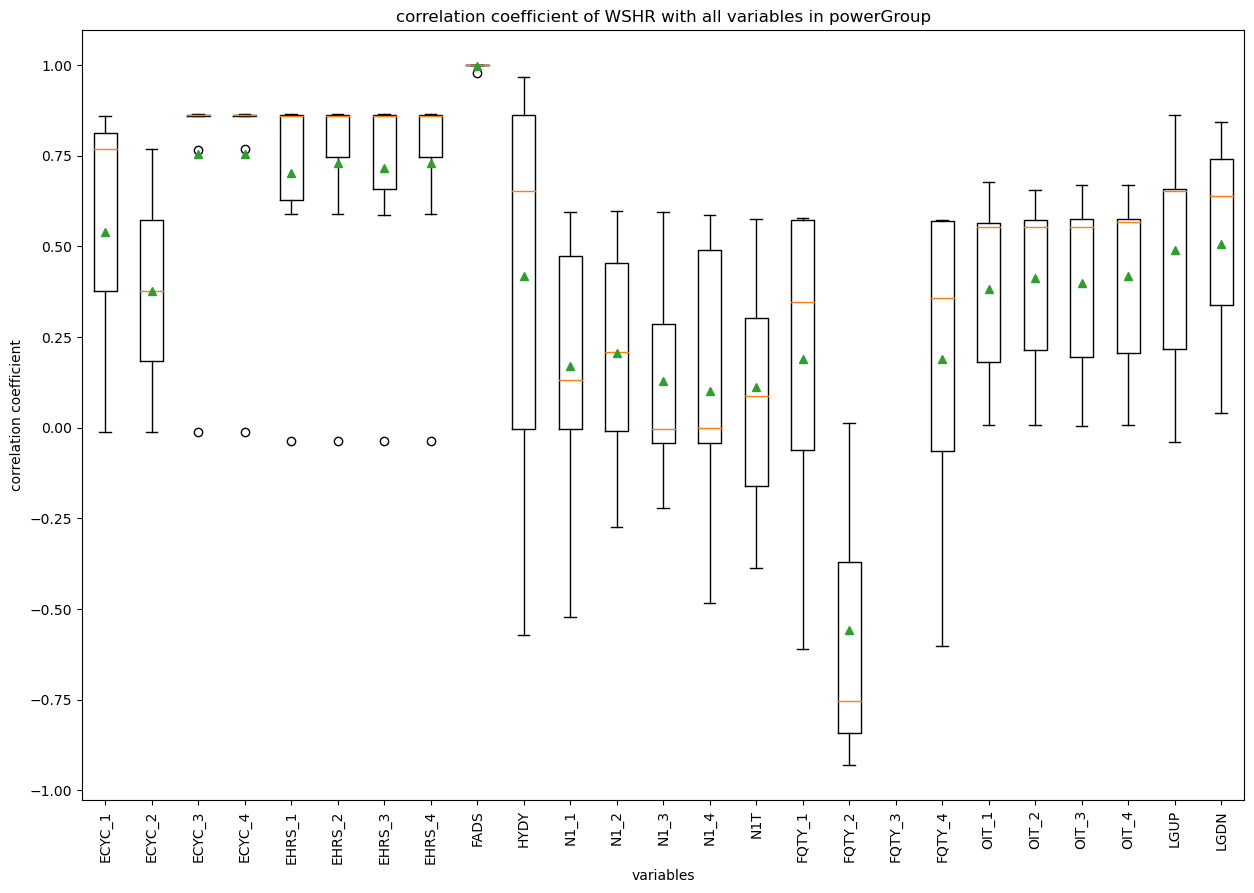

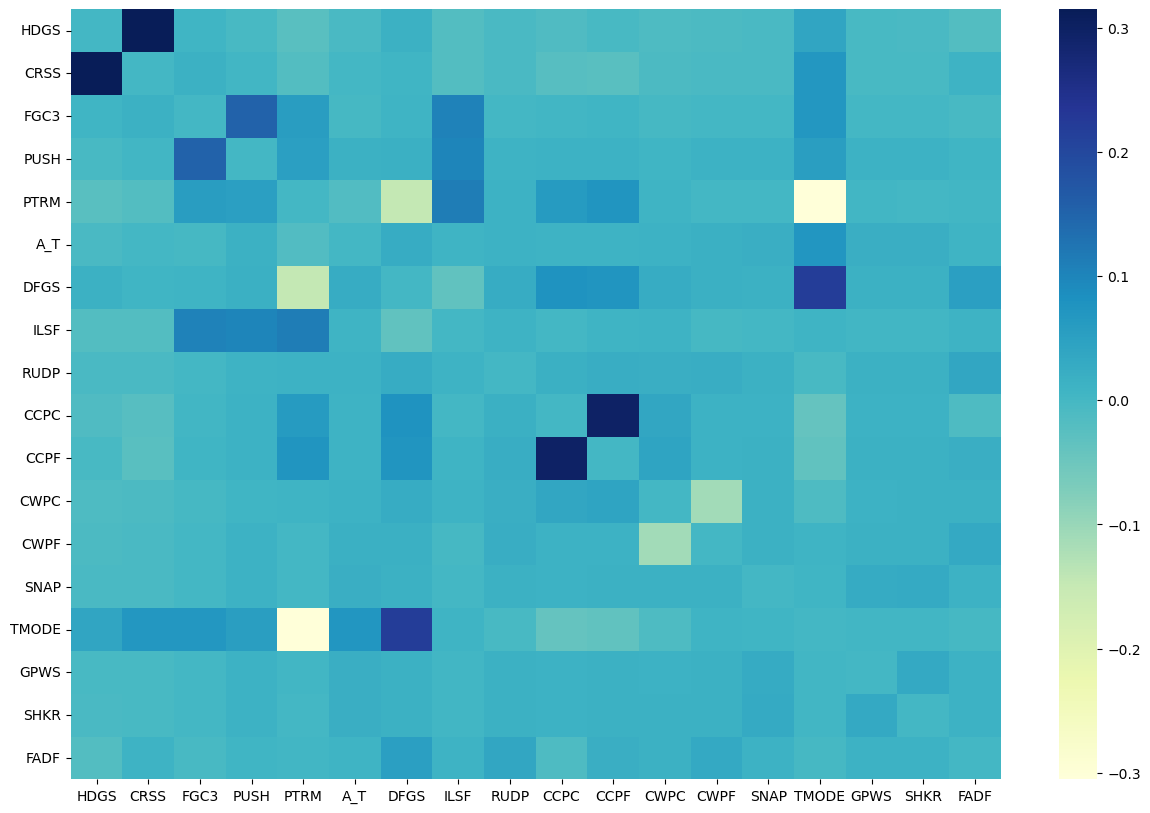

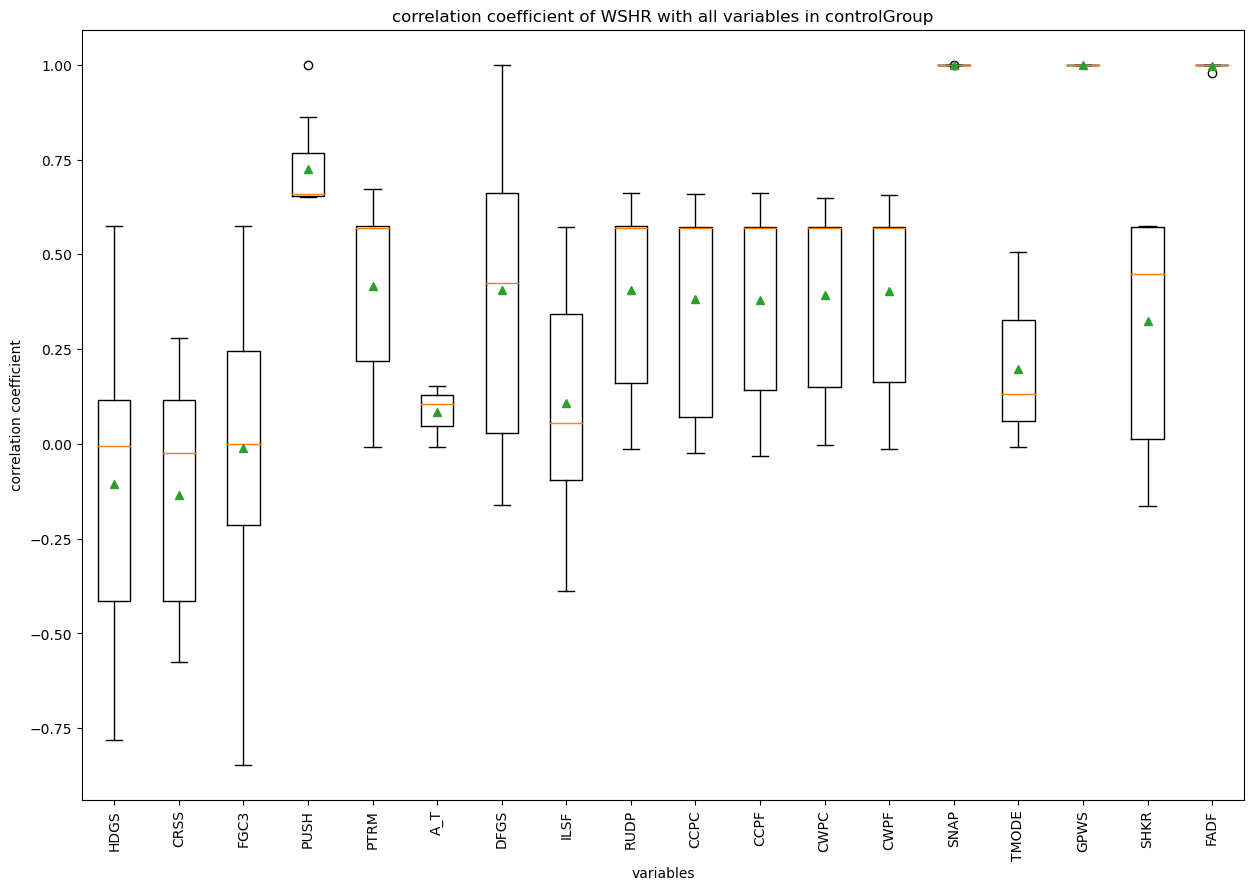

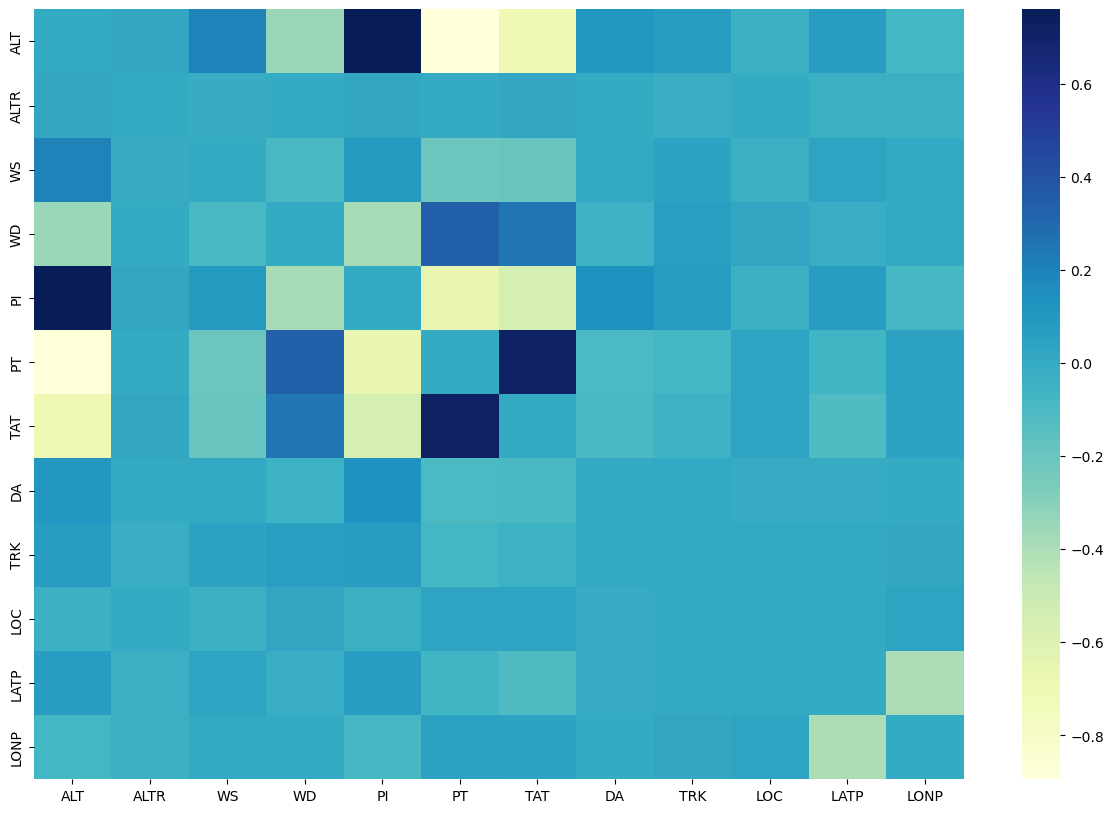

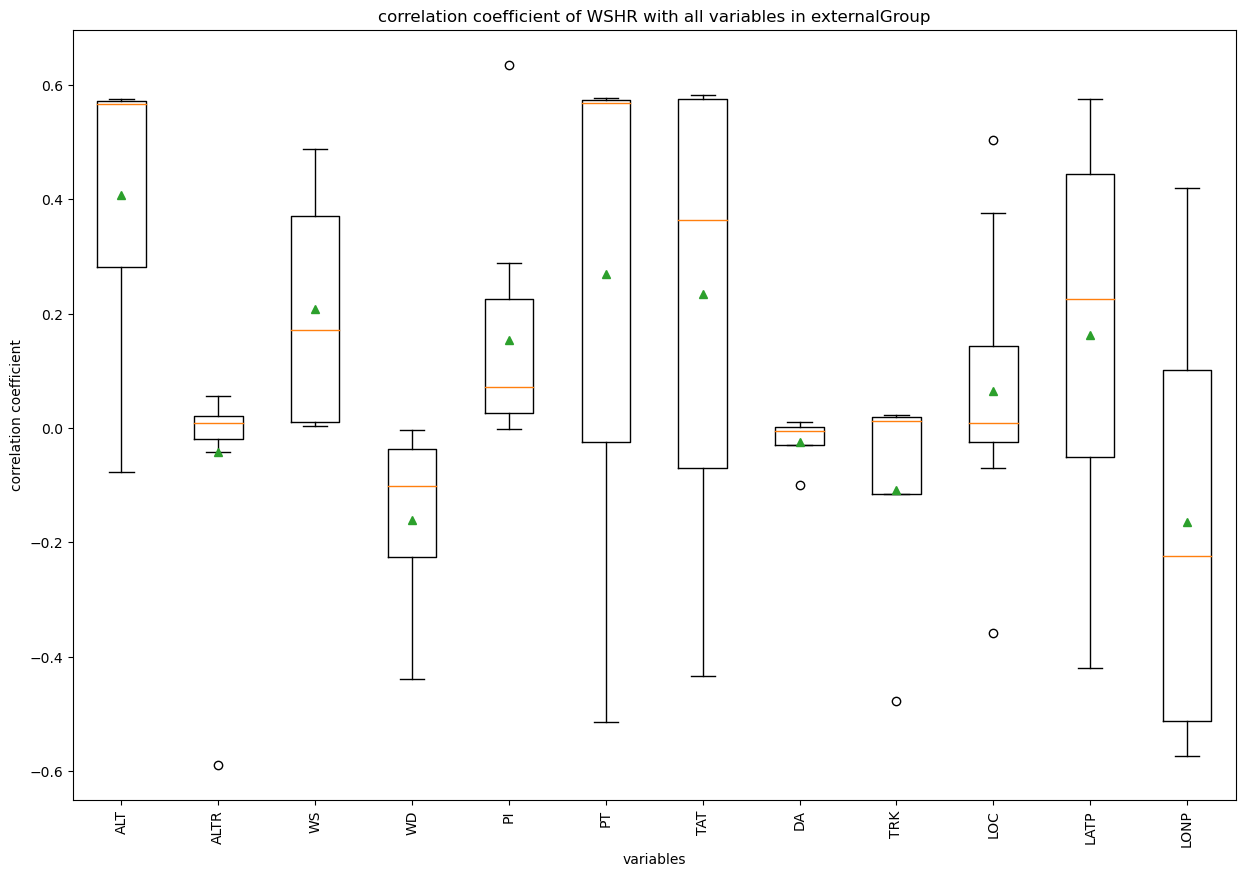

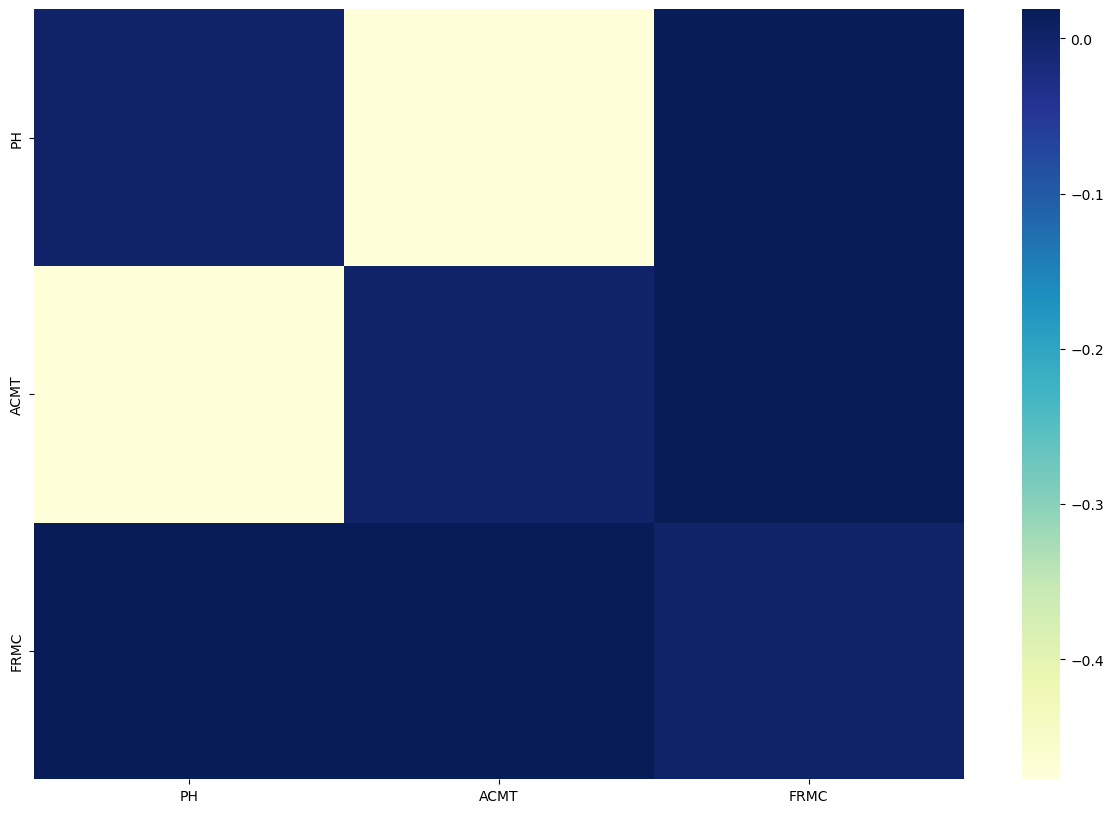

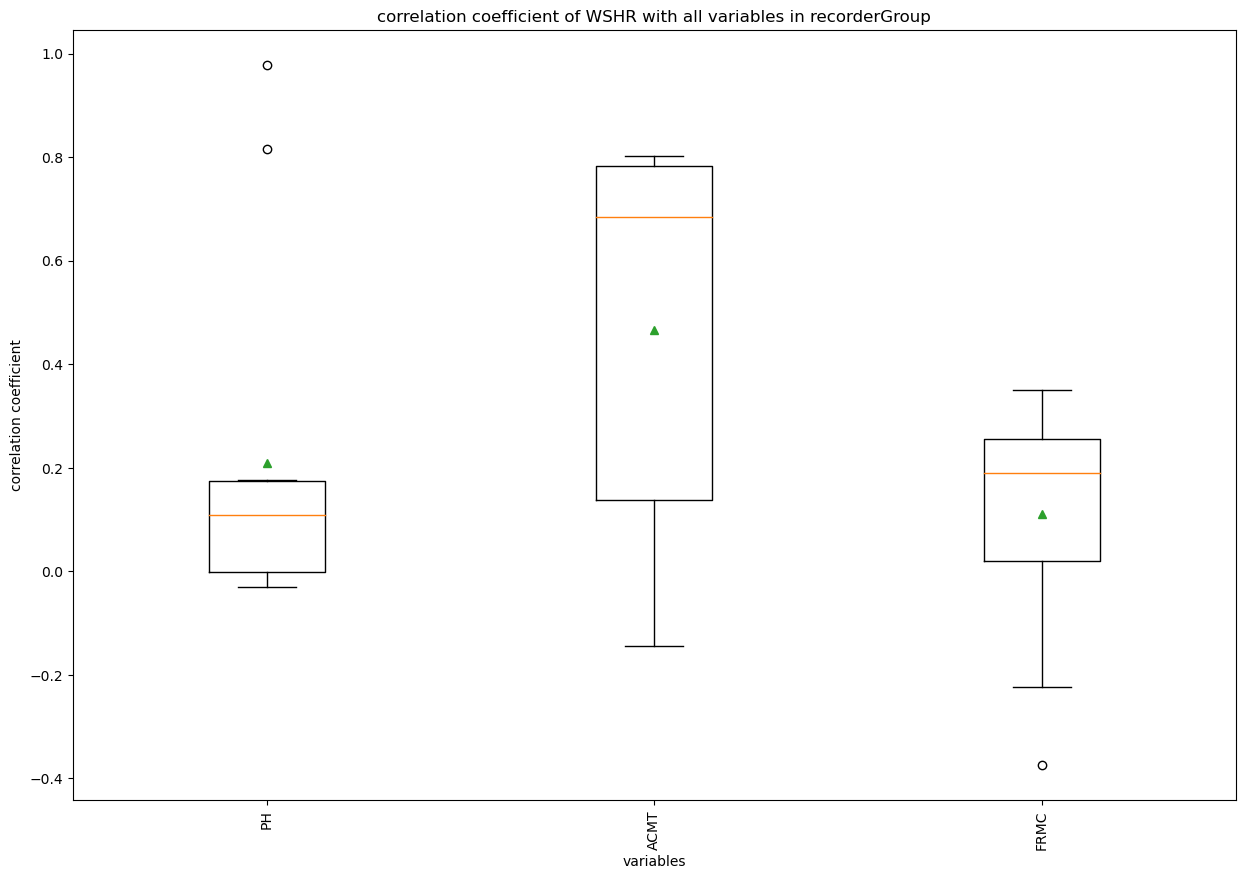

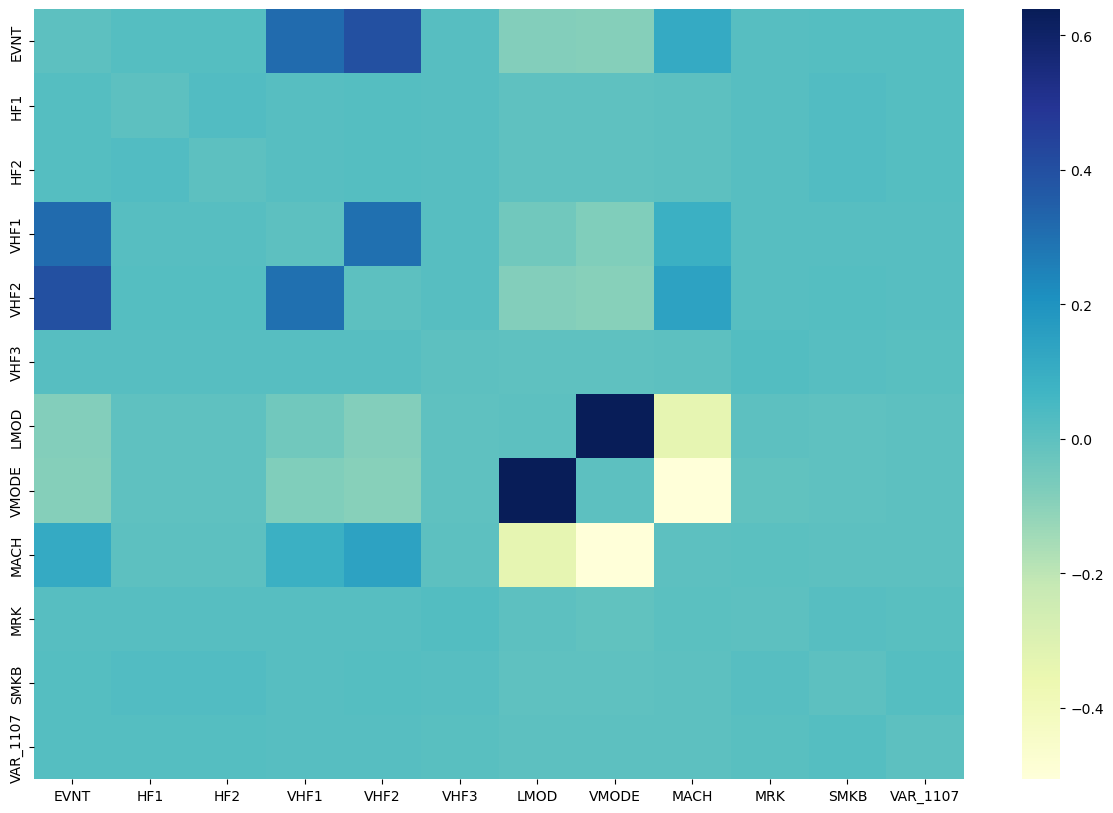

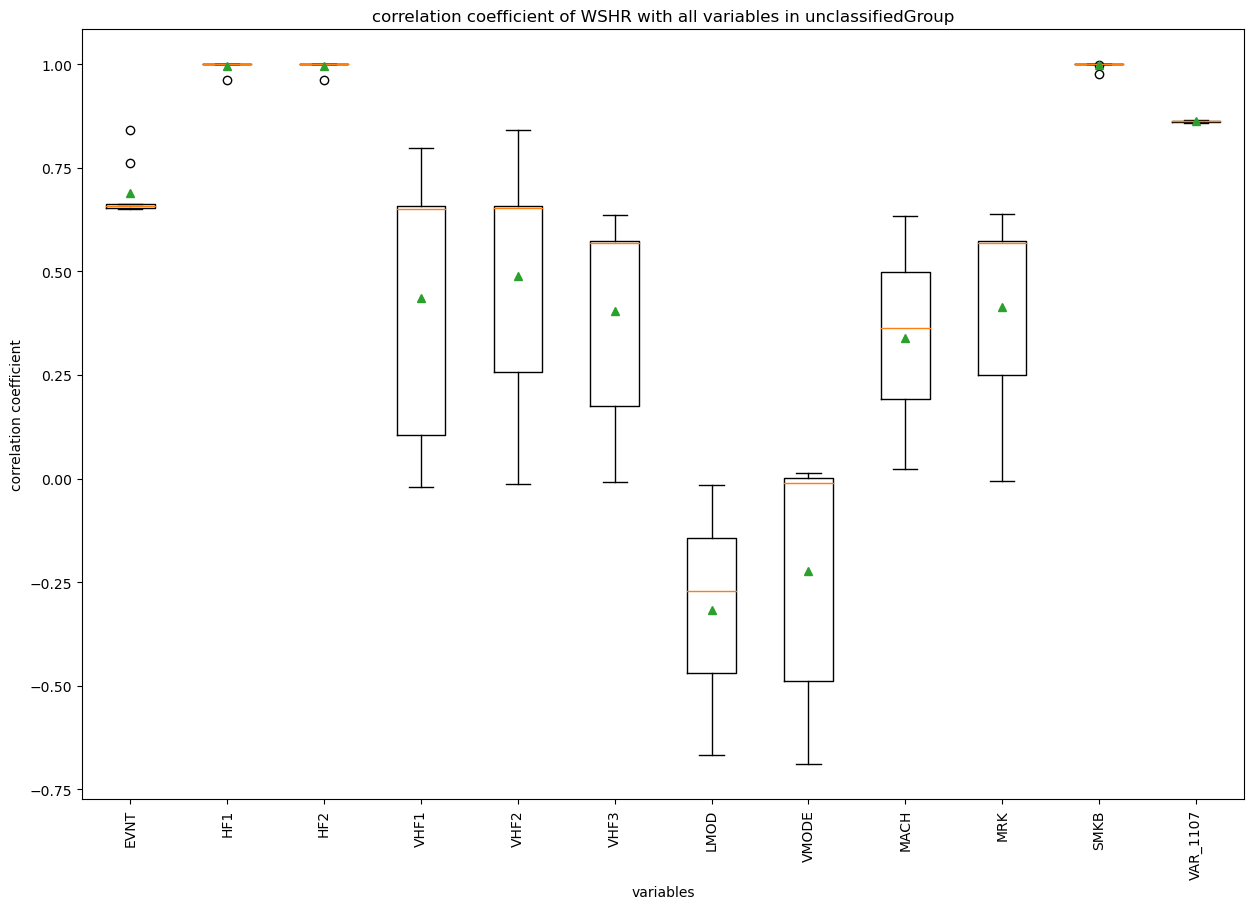

In [8]:
# calculate correlations matrix among variables in different group

corr_fig_savepath = os.path.join(correlation_savepath, "corr_fig")
if not os.path.exists(corr_fig_savepath):
    os.mkdir(corr_fig_savepath)

# 读取存储的数据文件
WSHR_data_list = np.load(os.path.join(correlation_savepath, "WSHR_data_list.npy"), allow_pickle=True)
variables_data_lists_dict = {group_name: np.load(os.path.join(correlation_savepath, group_name+"_variables_data_lists.npy"), allow_pickle=True) for group_name in group_names_list}
# WSHR_data_list = np.load(os.path.join(all_var_correlation_savepath, "WSHR_data_list.npy"), allow_pickle=True)
# variables_data_lists_dict = {group_name: np.load(os.path.join(all_var_correlation_savepath, group_name+"_variables_data_lists.npy"), allow_pickle=True) for group_name in group_names_list}

# 基于"YlGnBu"颜色映射创建自定义颜色映射
cmap = plt.cm.get_cmap("YlGnBu")
colors = cmap(np.arange(cmap.N))
# colors[0] = (1, 1, 1, 1)  # 将第一个颜色设置为白色
cmap = ListedColormap(colors)

# 对同mat文件中的各组变量进行相关性分析
for group_name in group_names_list:
# for group_name in ["unclassified"]:
    variables_data_lists = variables_data_lists_dict[group_name]
    var_corr_matrices_list = []
    WSHR_var_corr_list = [[] for iVar in range(group_lens_dict[group_name])]
    for iFolder in range(len(WSHR_data_list)):
        WSHR_data = WSHR_data_list[iFolder]
        variables_data_dict = variables_data_lists[iFolder]
        # 以WSHR长度为标准对其他变量进行采样
        standard_length = len(WSHR_data)
        # print(standard_length)
        var_sampling_dict = {}
        for var_name, var_data in variables_data_dict.items():
            if var_name in var_groups_dict[group_name]:
                # var_sampling_list = random.choices(var_data, k=standard_length)
                # var_sampling_list = [value.tolist()[0] for value in var_sampling_list]
                var_sampling_list = [var_data[min(int(i*len(var_data)/standard_length), len(var_data)-1)].tolist()[0] for i in range(standard_length)]
                WSHR_data = [int(value) for value in WSHR_data]
                var_sampling_dict[var_name] = var_sampling_list

                # tmp_df = pd.DataFrame({"WSHR": WSHR_data, "var_sampling": var_sampling_list}).dropna()
                # WSHR_var_corr = np.corrcoef(tmp_df["WSHR"].tolist(), tmp_df["var_sampling"].tolist())[0, 1]
                if np.std(var_sampling_list) == 0 or np.std(WSHR_data) == 0:
                    WSHR_var_corr = np.nan
                else:
                    iVar = var_groups_dict[group_name].index(var_name)
                    # print(var_sampling_list, WSHR_data)
                    WSHR_var_corr = np.corrcoef(WSHR_data, var_sampling_list)[0, 1]
                    WSHR_var_corr_list[iVar].append(WSHR_var_corr)
                # print(WSHR_var_corr)

        var_sampling_df = pd.DataFrame(var_sampling_dict).dropna()
        # var_sampling_df = var_sampling_df.apply(pd.to_numeric, errors='coerce')
        var_corr = var_sampling_df.corr().fillna(0)
        np.fill_diagonal(var_corr.values, 0)
        # print(var_corr.values.shape)
        var_corr_matrices_list.append(var_corr)
        # print(var_corr)
    # 对所有变量相关性矩阵做平均并打印heatmap
    var_corr_matrix = np.mean(var_corr_matrices_list, axis=0)
    # if group_name == "mechanism":
    #     print(var_corr_matrix[8])
    plt.figure(figsize=(15, 10), dpi=100)
    sns.heatmap(var_corr_matrix, annot=False, cmap=cmap, fmt='.1g', xticklabels=var_groups_dict[group_name], yticklabels=var_groups_dict[group_name])
    plt.savefig(os.path.join(corr_fig_savepath, "{"+group_name+"}_corr_heatmap.png"))

    # # 打印WSHR对所有变量的相关系数的箱线图
    plt.figure(figsize=(15, 10), dpi=100)
    plt.boxplot(WSHR_var_corr_list, labels=var_groups_dict[group_name], showmeans=True)
    plt.xticks(rotation='vertical')
    plt.ylabel("correlation coefficient")
    plt.xlabel("variables")
    plt.title("correlation coefficient of WSHR with all variables in " + group_name + "Group")
    plt.savefig(os.path.join(corr_fig_savepath, "WSHR_{"+group_name+"}_corr.png"))
    plt.show()


In [ ]:
# factors classification
'''
WSHR --> 警报变量; 征兆变量 --> WSHR; WSHR ~ 监控变量
'''
bias_fig_savepath = os.path.join(correlation_savepath, "bias_fig")
if not os.path.exists(bias_fig_savepath):
    os.mkdir(bias_fig_savepath)

# 读取存储的数据文件
WSHR_data_list = np.load(os.path.join(correlation_savepath, "WSHR_data_list.npy"), allow_pickle=True)
variables_data_lists_dict = {group_name: np.load(os.path.join(correlation_savepath, group_name+"_variables_data_lists.npy"), allow_pickle=True) for group_name in group_names_list}

# 规定警报倍率极限值
alert_multiple_limit = 20

# 对WSHR出现异常值的时刻，捕捉selected variables的对应区段，并与正常时刻值的均值和变差进行比较，将二分类的结果与WSHR做相关性分析，用来找到WSHR的警报变量
bias_atWSHR_dict = {group_name: [[] for i in range(len(var_groups_dict[group_name]))] for group_name in group_names_list}
for iFolder in range(len(WSHR_data_list)):
    WSHR_data = WSHR_data_list[iFolder]
    if np.sum(WSHR_data) < len(WSHR_data):
        warn_position_list = np.where(WSHR_data == 0)[0]
        # print(warn_position_list)
        if np.array_equal(warn_position_list, [0, 1, 2]):
            continue
        
        for group_name in group_names_list:
            group_fig_savepath = os.path.join(bias_fig_savepath, group_name)
            if not os.path.exists(group_fig_savepath):
                os.mkdir(group_fig_savepath)

            variables_data_dict = variables_data_lists_dict[group_name][iFolder]
            bias_atWSHR_list = bias_atWSHR_dict[group_name]
            for var_name, var_data in variables_data_dict.items():
                if var_name in var_groups_dict[group_name]:
                    multiplier = len(var_data) / len(WSHR_data)
                    select_position_list = []
                    for j in range(floor(multiplier)):
                        select_position_list.extend([int(i * multiplier)-j for i in warn_position_list if int(i * multiplier)-j >= 0])
                    # print(multiplier, select_position_list)
                    
                    selected_data = var_data[select_position_list]
                    remain_data = var_data[[i for i in range(len(var_data)) if i not in select_position_list]]
                    if np.std(remain_data) > 1:
                        # bias_list = []
                        # for value in selected_data:
                        #     bias_list.append(abs((value - np.mean(remain_data)) / np.std(remain_data)).tolist()[0])
                        #     if bias_list[-1] > 100:
                        #         print(value, np.mean(remain_data), np.std(remain_data), bias_list[-1])
                        bias_list = [min(abs((value - np.mean(remain_data)) / np.std(remain_data)).tolist()[0], alert_multiple_limit) for value in selected_data]
                        # print(np.std(remain_data), np.mean(remain_data), np.mean(remain_data)/np.std(remain_data))
                    elif np.mean(remain_data) != 0:
                        bias_list = [min(abs((value - np.mean(remain_data)) / np.mean(remain_data)).tolist()[0], alert_multiple_limit) for value in selected_data]
                    else:
                        bias_list = [0 for value in selected_data]
                    # print(bias_list)

                    group_folder_fig_savepath = os.path.join(group_fig_savepath, download_folder_names[iFolder])
                    if not os.path.exists(group_folder_fig_savepath):
                        os.mkdir(group_folder_fig_savepath)

                    selected_data = [np.nan if i not in select_position_list else var_data[i] for i in range(len(var_data))]
                    remain_data = [np.nan if i in select_position_list else var_data[i] for i in range(len(var_data))]
                    plt.figure()
                    plt.plot(var_data, label='var_data', color='blue')
                    plt.plot(selected_data, label='selected_data', color='red')
                    plt.plot(remain_data, label='remain_data', color='green')
                    plt.title(f'variable data of {var_name} in group {group_name}')
                    plt.legend()
                    plt.savefig(os.path.join(group_folder_fig_savepath, f"{var_name}.png"))
                    plt.show()

                    if var_groups_dict[group_name].index(var_name) == 0:
                        plt.figure()
                        plt.plot(WSHR_data)
                        plt.title('WSHR data')
                        plt.savefig(os.path.join(group_folder_fig_savepath, "WSHR.png"))
                        plt.show()

                    bias_atWSHR_list[var_groups_dict[group_name].index(var_name)].extend(bias_list)
        # break

# 打印各变量组在WSHR对应位置的偏差倍率的箱线图
alert_variables_dict = {}
for group_name in group_names_list:
    bias_atWSHR_list = bias_atWSHR_dict[group_name]
    alert_variables_dict[group_name] = {var_groups_dict[group_name][iVar]:[]  for iVar in range(len(bias_atWSHR_list)) if np.mean(bias_atWSHR_list[iVar]) > 3 or np.median(bias_atWSHR_list[iVar]) == 1}
    plt.figure(figsize=(10, 10))
    plt.boxplot(bias_atWSHR_list, labels=var_groups_dict[group_name], showmeans=True)
    plt.axhline(y=3, color='red', linestyle='--')
    plt.xticks(rotation='vertical')
    plt.ylabel("bias rate of sigma")
    plt.xlabel("variables")
    plt.title("bias rate of all variables at WSHR moment in " + group_name + " Group")
    plt.savefig(os.path.join(bias_fig_savepath, "{"+group_name+"}_bias_atWSHR.png"))
    plt.show()
print(f"Possible Alert variables: {alert_variables_dict}")

In [68]:
alert_variables_dict = {}
for group_name in group_names_list:
    bias_atWSHR_list = bias_atWSHR_dict[group_name]
    # alert_variables_dict[group_name] = {var_groups_dict[group_name][iVar]:[]  for iVar in range(len(bias_atWSHR_list)) if np.mean(bias_atWSHR_list[iVar]) > 3 or np.median(bias_atWSHR_list[iVar]) == 1}
    alert_variables_dict[group_name] = {var_groups_dict[group_name][iVar]:[]  for iVar in range(len(bias_atWSHR_list)) if np.mean(bias_atWSHR_list[iVar]) > 3}
print(f"Possible Alert variables: {alert_variables_dict}")

Possible Alert variables: {'mechanism': {}, 'power': {'FADS': [], 'FQTY_2': [], 'OIPL': []}, 'control': {'FADF': []}, 'external': {'LOC': []}, 'recorder': {'CTAC': [], 'LATG': [], 'LONG': [], 'GMT_HOUR': [], 'GMT_MINUTE': []}, 'unclassified': {'N1CO': []}}


d:\coding\Anaconda\Software\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\coding\Anaconda\Software\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


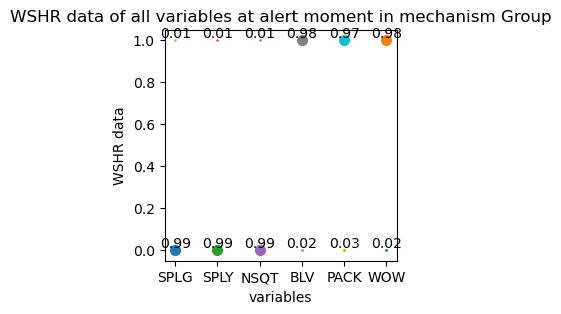

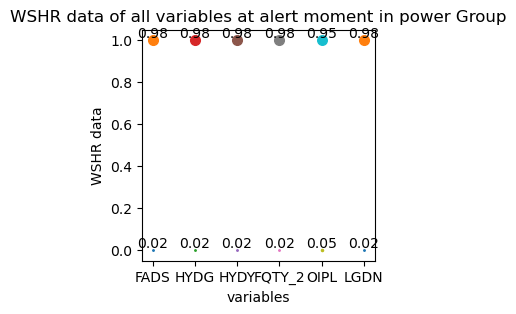

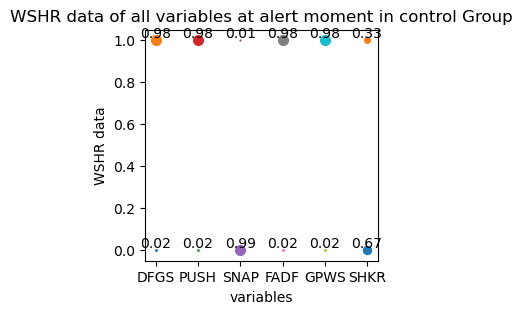

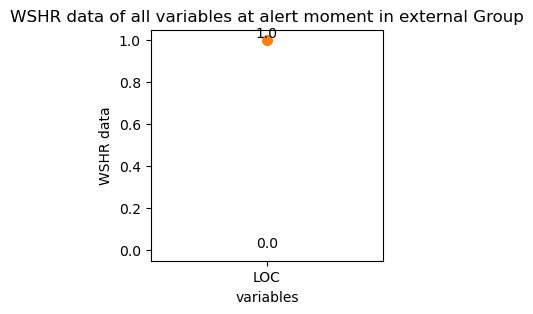

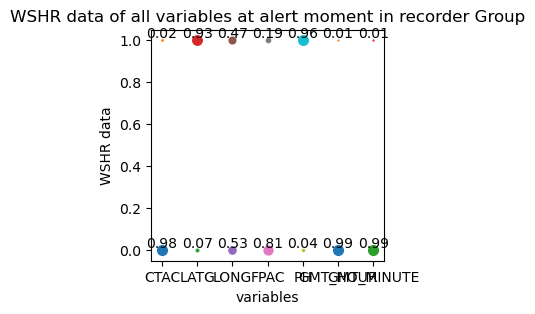

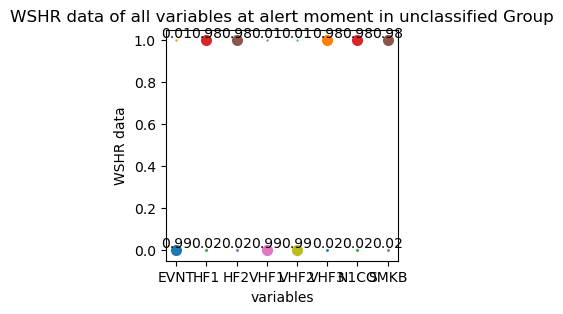

Possible Indicate variables: {'mechanism': ['SPLG', 'SPLY', 'NSQT'], 'power': [], 'control': ['SNAP', 'SHKR'], 'external': [], 'recorder': ['CTAC', 'LONG', 'FPAC', 'GMT_HOUR', 'GMT_MINUTE'], 'unclassified': ['EVNT', 'VHF1', 'VHF2']}


In [66]:
# 对警报变量在WSHR时刻的取值范围进行全搜索，检查是否是独属于WSHR的值域，如果是则为征兆变量

# 读取存储的数据文件
WSHR_data_list = np.load(os.path.join(correlation_savepath, "WSHR_data_list.npy"), allow_pickle=True)
variables_data_lists_dict = {group_name: np.load(os.path.join(correlation_savepath, group_name+"_variables_data_lists.npy"), allow_pickle=True) for group_name in group_names_list}

group_atWSHR_dict = {group_name: {var_name:[] for var_name in alert_variables_dict[group_name].keys()} for group_name in group_names_list}
continuous_threshold = 1
for iFolder in range(len(WSHR_data_list)):
    WSHR_data = WSHR_data_list[iFolder]
    if np.sum(WSHR_data) < len(WSHR_data):
        warn_position_list = np.where(WSHR_data == 0)[0]
        # print(warn_position_list)
        if np.array_equal(warn_position_list, [0, 1, 2]):
            continue
        
        for group_name in group_names_list:
            variables_data_dict = variables_data_lists_dict[group_name][iFolder]
            var_atWSHR_dict = group_atWSHR_dict[group_name]
            for var_name, var_data in variables_data_dict.items():
                if var_name in list(alert_variables_dict[group_name].keys()):
                    multiplier = len(var_data) / len(WSHR_data)
                    select_position_list = []
                    for j in range(floor(multiplier)):
                        select_position_list.extend([int(i * multiplier)-j for i in warn_position_list if int(i * multiplier)-j >= 0])
                    # print(multiplier, select_position_list)
                    selected_data = [value.tolist()[0] for value in var_data[select_position_list]]
                
                    value_range = []
                    # print(selected_data)
                    for i, value in enumerate(selected_data):
                        if i == 0:
                            value_range_element = [value, value]
                        if i < len(selected_data) - 1:
                            nxt_value = selected_data[i+1]
                            if abs(nxt_value - value) <= continuous_threshold:
                                value_range_element[1] = nxt_value
                            else:
                                value_range.append(value_range_element)
                                value_range_element = [nxt_value, nxt_value]
                        else:
                            value_range_element[1] = value
                            value_range.append(value_range_element)

                    var_atWSHR_dict[var_name].extend(value_range)
    # break

# print(group_atWSHR_dict)

var_distribute_range_dict = {}
for group_name in group_names_list:
    var_atWSHR_dict = group_atWSHR_dict[group_name]
    var_distribute_range_dict[group_name] = {}
    for var_name, value_ranges in var_atWSHR_dict.items():
        var_distribute_range_dict[group_name][var_name] = []
        for value_range in value_ranges:
            if value_range not in var_distribute_range_dict[group_name][var_name]:
                var_distribute_range_dict[group_name][var_name].append(value_range)
# print(var_distribute_range_dict)

WSHR_selected_data_dict = {}
for iFolder in range(len(WSHR_data_list)):
    WSHR_data = WSHR_data_list[iFolder]
    for group_name in group_names_list:
        variables_data_dict = variables_data_lists_dict[group_name][iFolder]
        WSHR_selected_data_dict[group_name] = [[] for iVar in range(len(alert_variables_dict[group_name].keys()))]
        for var_name, value_ranges in var_distribute_range_dict[group_name].items():
            var_array = np.array(variables_data_dict[var_name])
            multiplier = len(WSHR_data) / len(var_array)
            distribute_position_list = []
            for value_range in value_ranges:
                distribute_position_list.extend(np.where((value_range[0]<= var_array) & (var_array <= value_range[1]))[0])
            WSHR_select_position_list = []
            if multiplier >= 1:
                for j in range(floor(multiplier)):
                    WSHR_select_position_list.extend([int(i * multiplier)-j for i in distribute_position_list if int(i * multiplier)-j >= 0])
            else:
                WSHR_select_position_list.extend([int(i * multiplier) for i in distribute_position_list if int(i * multiplier) >= 0])
            WSHR_select_list = WSHR_data[WSHR_select_position_list]
            WSHR_selected_data_dict[group_name][list(alert_variables_dict[group_name].keys()).index(var_name)] = WSHR_select_list

# 打印WSHR在各警报变量对应位置的值的散点图
standard_radium = 50
indicate_variables_dict = {}
for group_name in group_names_list:
    WSHR_group_list = WSHR_selected_data_dict[group_name]
    indicate_variables_dict[group_name] = []
    plt.figure(figsize=(5, 5))
    for iVar in range(len(WSHR_group_list)):
        counter = [len(WSHR_group_list[iVar])-sum(WSHR_group_list[iVar]), sum(WSHR_group_list[iVar])]
        if counter[0] > counter[1]:
            indicate_variables_dict[group_name].append(list(alert_variables_dict[group_name].keys())[iVar])
        for iValue in [0,1]:
            plt.scatter(iVar, iValue, s = counter[iValue]/len(WSHR_group_list[iVar])*standard_radium)
            # print(counter[iValue]/len(WSHR_group_list[iVar])*standard_radium)
            plt.text(iVar, iValue, str(round((counter[iValue]/len(WSHR_group_list[iVar]))[0],2)), ha='center', va='bottom')
    plt.xticks([i for i in range(len(list(alert_variables_dict[group_name].keys())))], list(alert_variables_dict[group_name].keys()))
    plt.ylabel("WSHR data")
    plt.xlabel("variables")
    plt.title("WSHR data of all variables at alert moment in " + group_name + " Group")
    plt.savefig(os.path.join(bias_fig_savepath, "{"+group_name+"}_WSHR_atAlert.png"))
    plt.show()
print(f"Possible Indicate variables: {indicate_variables_dict}")

[0.8530280649926145, 0.9918759231905465, 0.9918759231905465, 0.856076735411423, 0.8532728038530677, 0.9916309089717654]


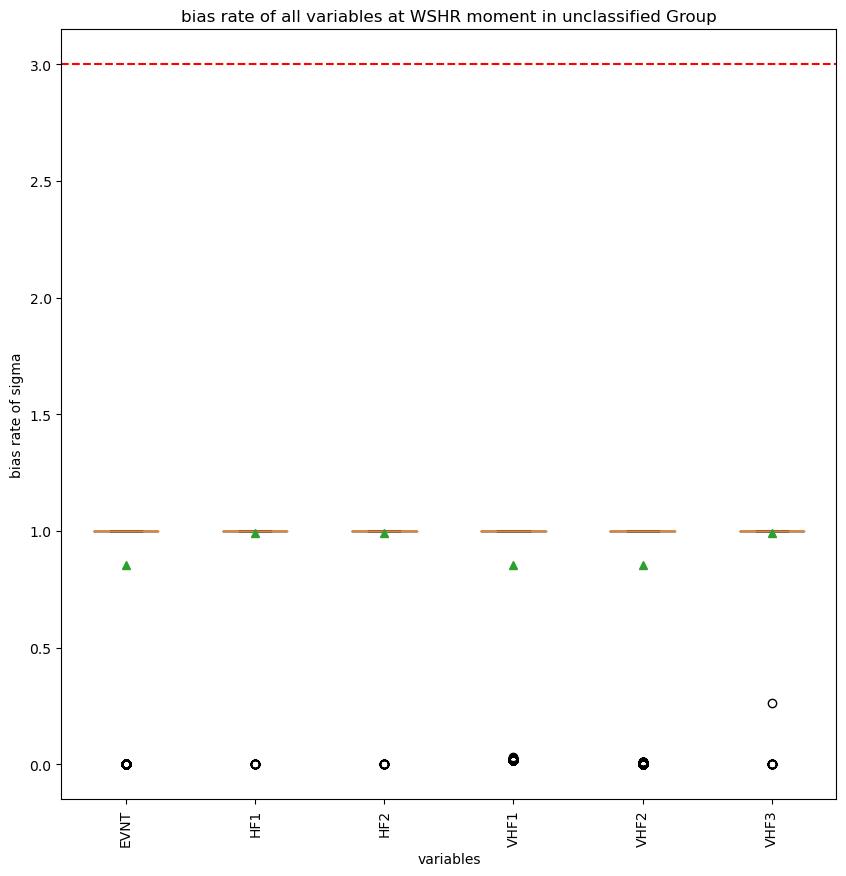

Possible Alert variables: {'unclassified': {}}


In [36]:
# 打印各变量组在WSHR对应位置的偏差倍率的箱线图
alert_variables_dict = {}
# for group_name in group_names_list:
for group_name in ["unclassified"]:
    bias_atWSHR_list = bias_atWSHR_dict[group_name]
    alert_variables_dict[group_name] = {var_groups_dict[group_name][iVar]:[] for iVar in range(len(bias_atWSHR_list)) if np.mean(bias_atWSHR_list[iVar]) > 3 or np.median(bias_atWSHR_list[iVar]) == 1}
    # print([np.mean(bias_atWSHR_list[iVar]) for iVar in range(len(bias_atWSHR_list))])
    plt.figure(figsize=(10, 10))
    plt.boxplot(bias_atWSHR_list, labels=var_groups_dict[group_name], showmeans=True)
    plt.axhline(y=3, color='red', linestyle='--')
    plt.xticks(rotation='vertical')
    plt.ylabel("bias rate of sigma")
    plt.xlabel("variables")
    plt.title("bias rate of all variables at WSHR moment in " + group_name + " Group")
    plt.savefig(os.path.join(bias_fig_savepath, "{"+group_name+"}_bias_atWSHR.png"))
    plt.show()
print(f"Possible Alert variables: {alert_variables_dict}")

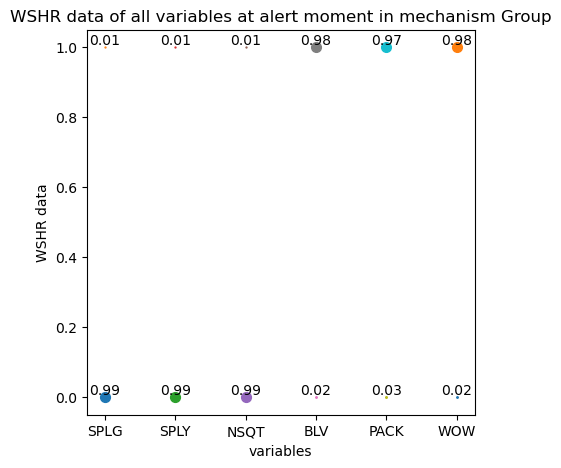

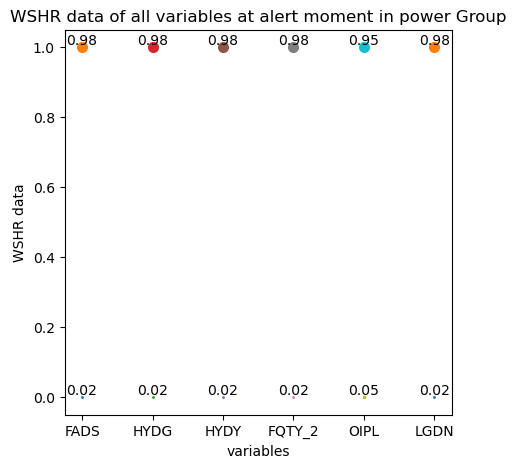

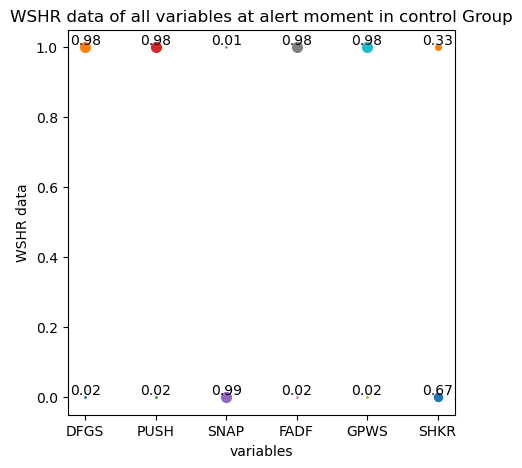

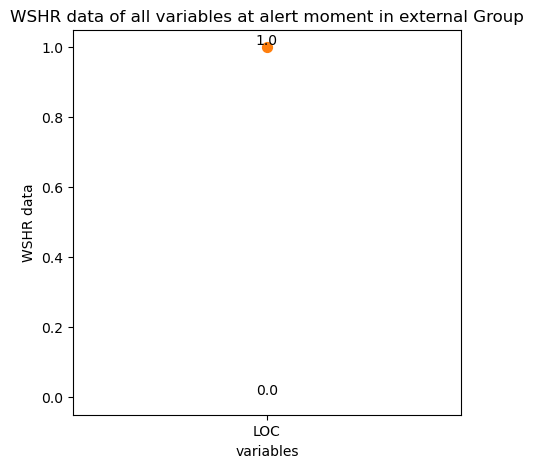

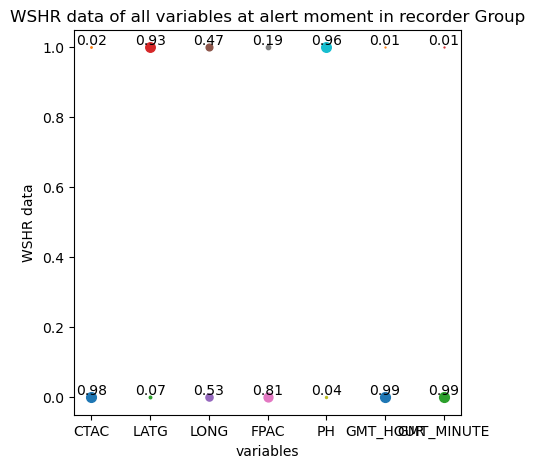

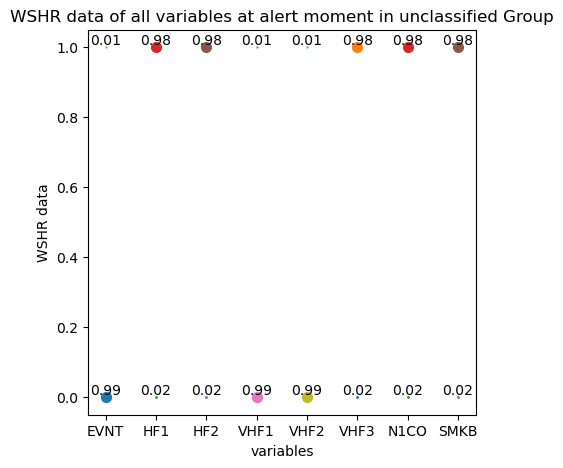

Possible Indicate variables: {'mechanism': ['SPLG', 'SPLY', 'NSQT'], 'power': [], 'control': ['SNAP', 'SHKR'], 'external': [], 'recorder': ['CTAC', 'LONG', 'FPAC', 'GMT_HOUR', 'GMT_MINUTE'], 'unclassified': ['EVNT', 'VHF1', 'VHF2']}


In [67]:
# 打印WSHR在各警报变量对应位置的值的散点图
standard_radium = 50
indicate_variables_dict = {}
for group_name in group_names_list:
    WSHR_group_list = WSHR_selected_data_dict[group_name]
    indicate_variables_dict[group_name] = []
    plt.figure(figsize=(5, 5))
    for iVar in range(len(WSHR_group_list)):
        counter = [len(WSHR_group_list[iVar])-sum(WSHR_group_list[iVar]), sum(WSHR_group_list[iVar])]
        if counter[0] > counter[1]:
            indicate_variables_dict[group_name].append(list(alert_variables_dict[group_name].keys())[iVar])
        for iValue in [0,1]:
            plt.scatter(iVar, iValue, s = counter[iValue]/len(WSHR_group_list[iVar])*standard_radium)
            # print(counter[iValue]/len(WSHR_group_list[iVar])*standard_radium)
            plt.text(iVar, iValue, str(round((counter[iValue]/len(WSHR_group_list[iVar]))[0],2)), ha='center', va='bottom')
    plt.xticks([i for i in range(len(list(alert_variables_dict[group_name].keys())))], list(alert_variables_dict[group_name].keys()))
    plt.ylabel("WSHR data")
    plt.xlabel("variables")
    plt.title("WSHR data of all variables at alert moment in " + group_name + " Group")
    plt.savefig(os.path.join(bias_fig_savepath, "{"+group_name+"}_WSHR_atAlert.png"))
    plt.show()
print(f"Possible Indicate variables: {indicate_variables_dict}")